# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [2]:
if not os.path.exists("lut.py"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

import lut

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

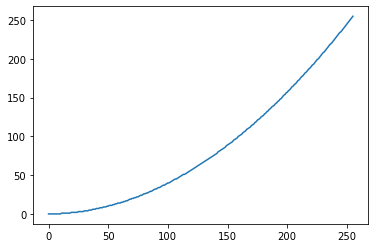

In [3]:
plt.plot(lut.kwadratowa)
plt.show()

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

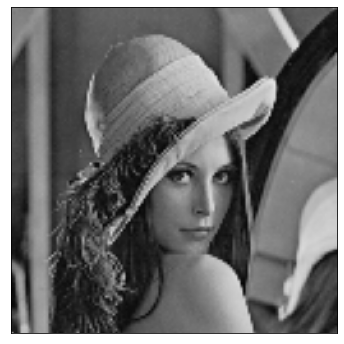

In [4]:
if not os.path.exists("lena.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
        
lena = cv2.imread("lena.bmp")

plt.figure (figsize=(6,6))
plt.imshow(lena)
plt.xticks([]), plt.yticks([])
plt.show()

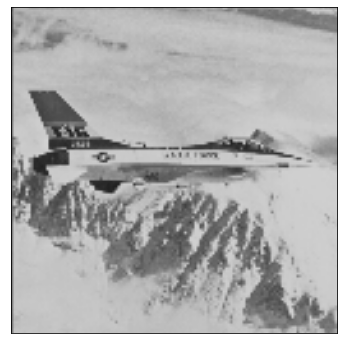

In [5]:
if not os.path.exists("jet.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp
        
jet = cv2.imread("jet.bmp")

plt.figure (figsize=(6,6))
plt.imshow(jet)
plt.xticks([]), plt.yticks([])
plt.show()

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

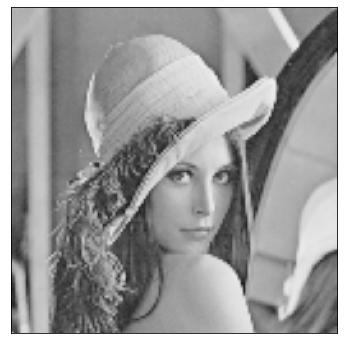

In [6]:
im = cv2.LUT (lena, lut.pierwiastkowa)

plt.figure (figsize=(6,6))
plt.imshow(im)
plt.xticks([]), plt.yticks([])
plt.show()

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [7]:
def LUT (image, arr):
    new_image = cv2.LUT (image, arr)
    fig = plt.figure (figsize=(15,4))
    plt.subplot(131)
    plt.title ("Wykres przekodowania")
    plt.plot (arr)
    plt.subplot(132)
    plt.title ("Obraz oryginalny")
    plt.imshow (image)
    plt.subplot(133)
    plt.title ("Obraz przetworzony")
    plt.imshow (new_image)
    plt.show()

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

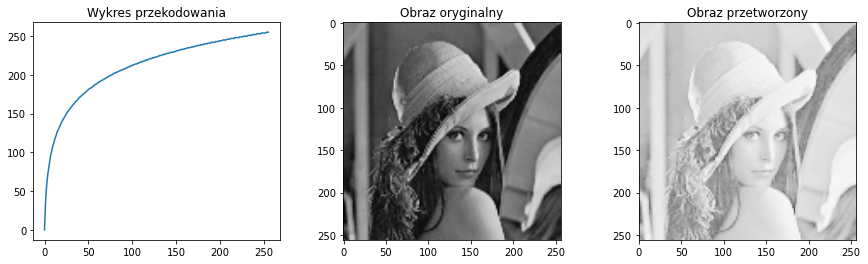

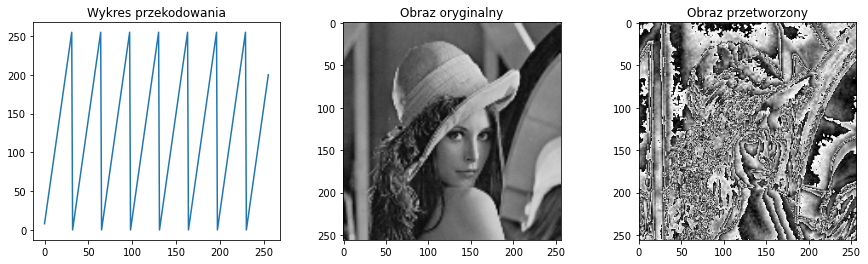

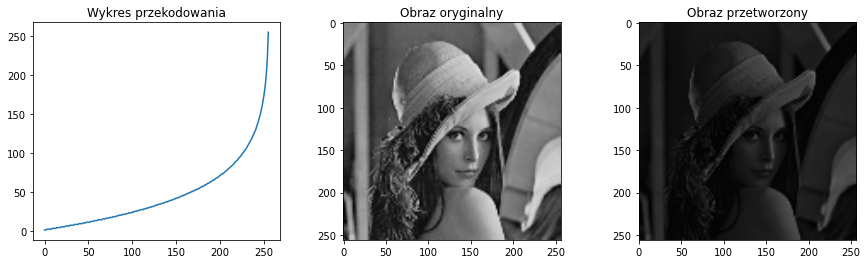

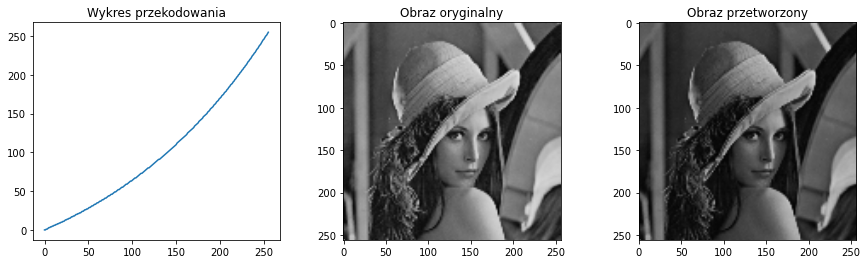

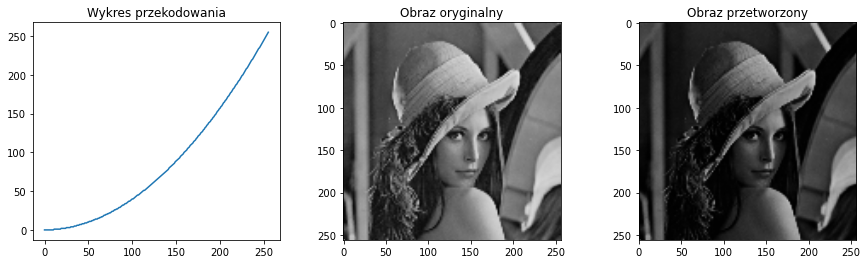

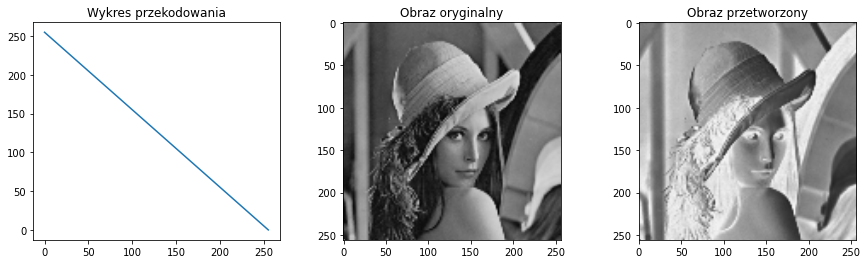

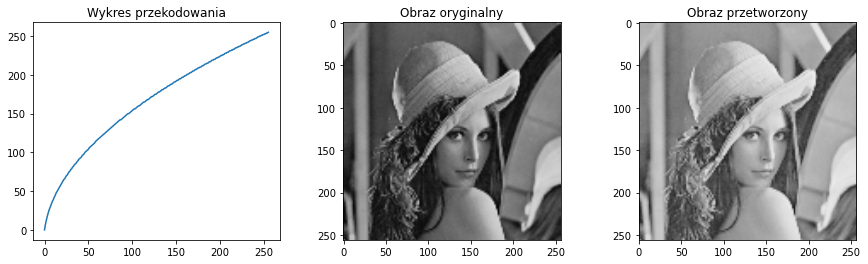

In [8]:
LUT (lena, lut.log)
LUT (lena, lut.pila)
LUT (lena, lut.odwlog)
LUT (lena, lut.wykladnicza)
LUT (lena, lut.kwadratowa)
LUT (lena, lut.odwrotna)
LUT (lena, lut.pierwiastkowa)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

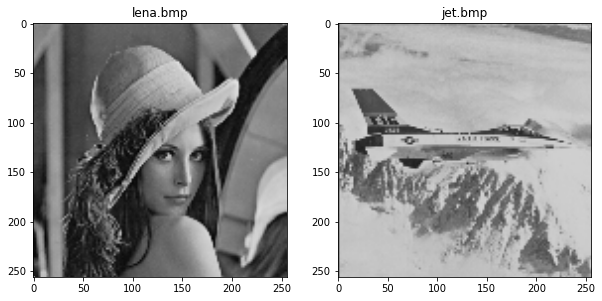

In [9]:
plt.figure (figsize=(10,10))
plt.subplot (121)
plt.title ("lena.bmp")
plt.imshow (lena)
plt.subplot (122)
plt.title ("jet.bmp")
plt.imshow (jet)
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

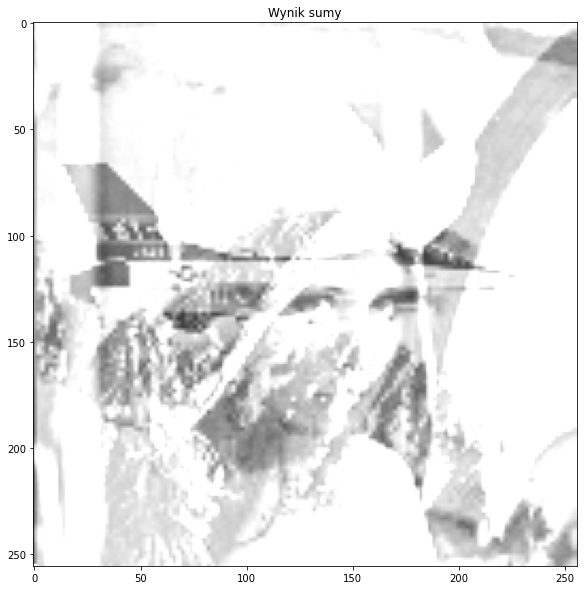

In [10]:
after_add = cv2.add (lena, jet)
plt.figure (figsize=(10,10))
plt.title ("Wynik sumy")
plt.imshow (after_add)
plt.show ()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

Główny problem - dużo bieli spoodowane obcięciem wartości powyżej zakresu do wartości 255.

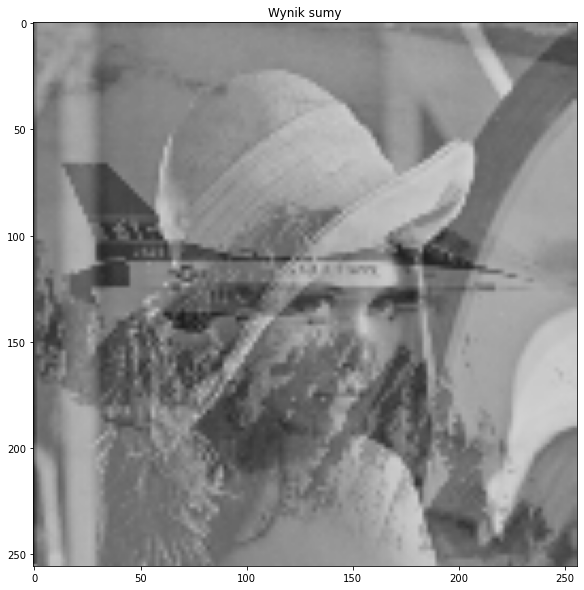

In [11]:
after_add_uint16 = cv2.add (lena.astype('uint16'), jet.astype('uint16'))
plt.figure (figsize=(10,10))
plt.title ("Wynik sumy")
plt.imshow ((after_add_uint16 / 2).astype('uint8'))
plt.show ()

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

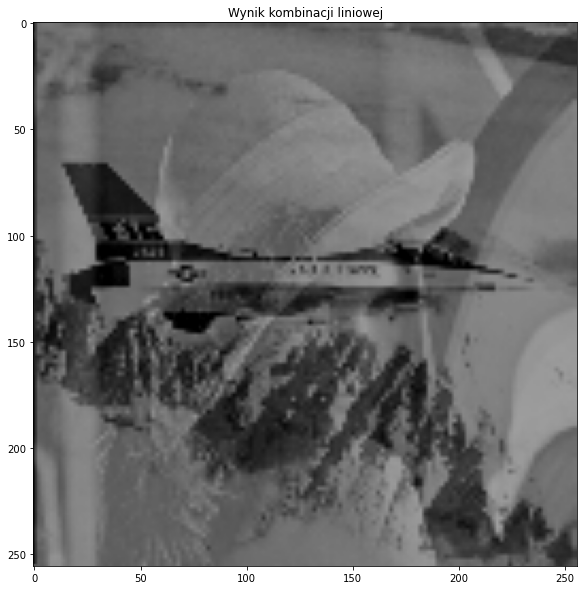

In [12]:
alpha = 0.3
beta = 1 - alpha
gamma = -50
after_add_weighted = cv2.addWeighted (lena, alpha, jet, beta, gamma)
plt.figure (figsize=(10,10))
plt.title ("Wynik kombinacji liniowej")
plt.imshow (after_add_weighted)
plt.show ()

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

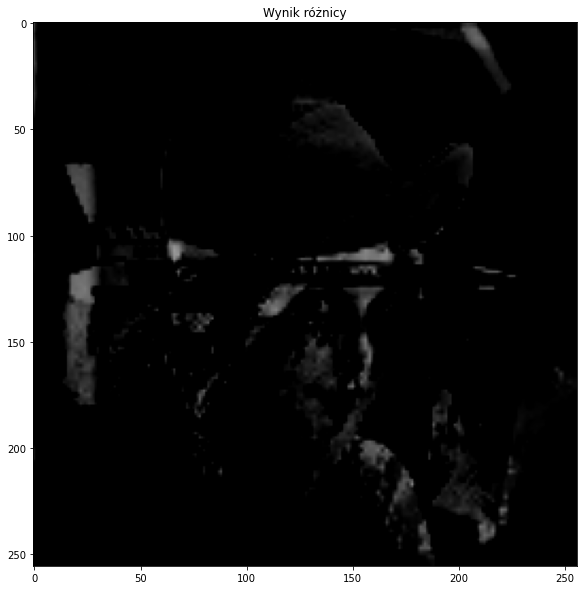

In [13]:
after_subtract = cv2.subtract (lena, jet)
plt.figure (figsize=(10,10))
plt.title ("Wynik różnicy")
plt.imshow (after_subtract)
plt.show ()

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

Główny problem - dużo czerni spoodowane obcięciem ujemnych wartości do 0.

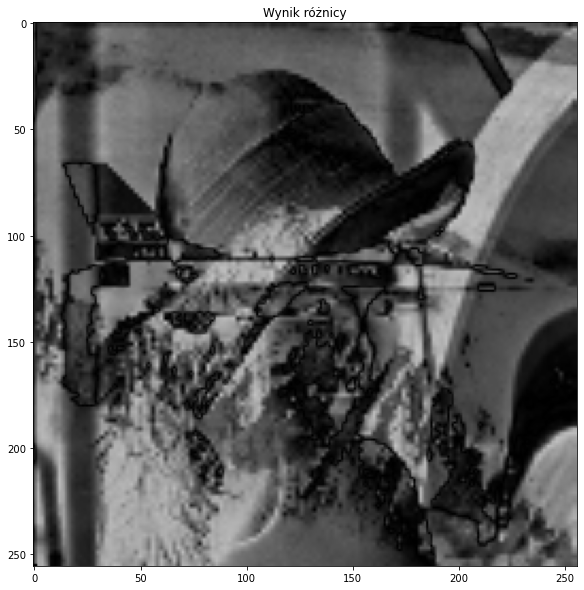

In [14]:
after_subtract_int16 = cv2.subtract (lena.astype('int16'), jet.astype('int16'))
plt.figure (figsize=(10,10))
plt.title ("Wynik różnicy")
plt.imshow ((np.abs(after_subtract_int16)).astype('uint8'))
plt.show ()

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

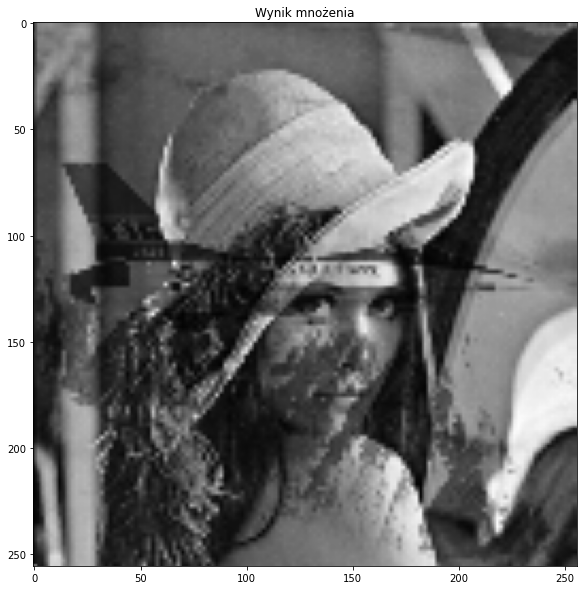

In [15]:
after_multiply = cv2.multiply (lena.astype('double'), jet.astype('double'))
plt.figure (figsize=(10,10))
plt.title ("Wynik mnożenia")
plt.imshow ((255*(after_multiply / np.amax(after_multiply))).astype('uint8'))
plt.show ()

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

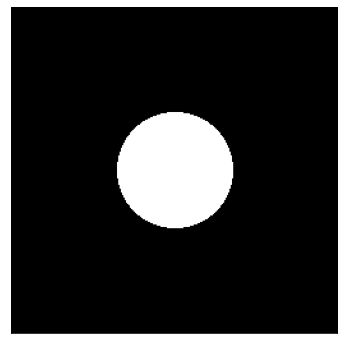

In [16]:
if not os.path.exists("kolo.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp
        
kolo = cv2.imread("kolo.bmp")

plt.figure (figsize=(6,6))
plt.imshow(kolo)
plt.xticks([]), plt.yticks([])
plt.show()

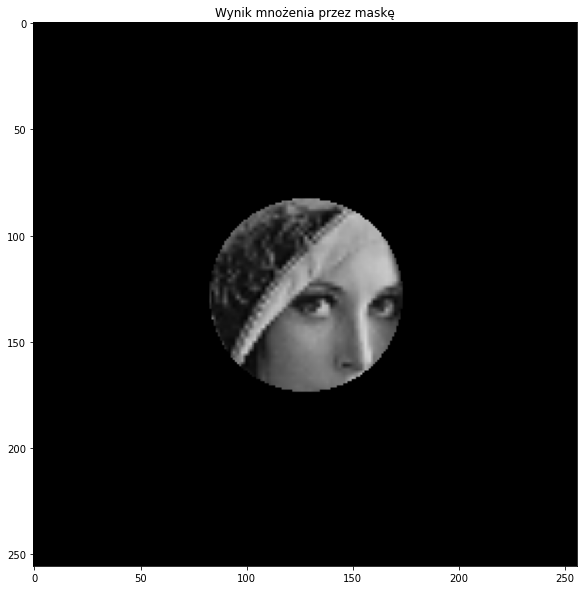

In [17]:
after_mask = cv2.multiply (lena, kolo.astype('bool').astype('uint8'))
plt.figure (figsize=(10,10))
plt.title ("Wynik mnożenia przez maskę")
plt.imshow (after_mask)
plt.show ()

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

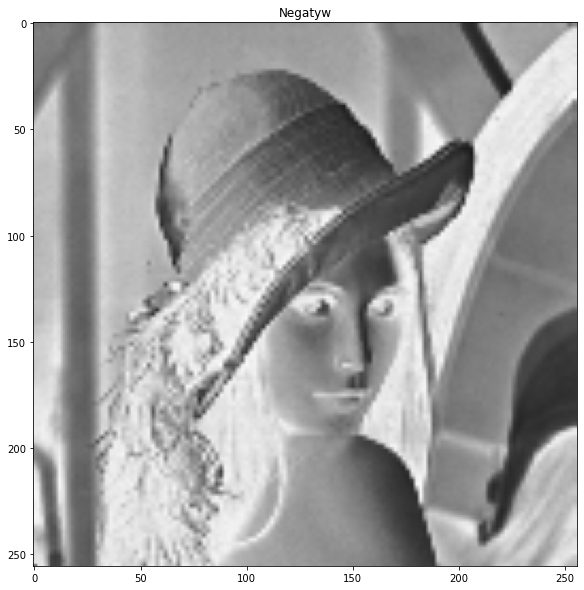

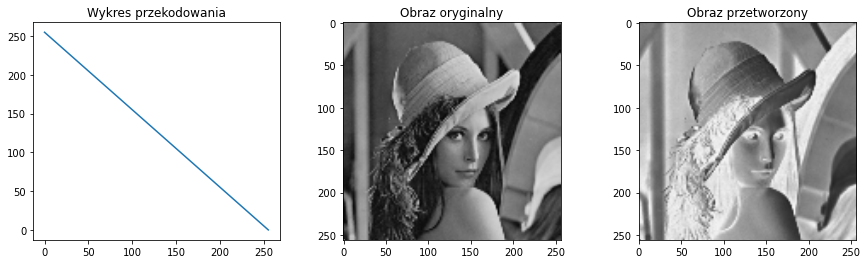

In [18]:
after_negation = cv2.bitwise_not(lena)
plt.figure (figsize=(10,10))
plt.title ("Negatyw")
plt.imshow (after_negation)
plt.show ()
LUT (lena, lut.odwrotna)

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

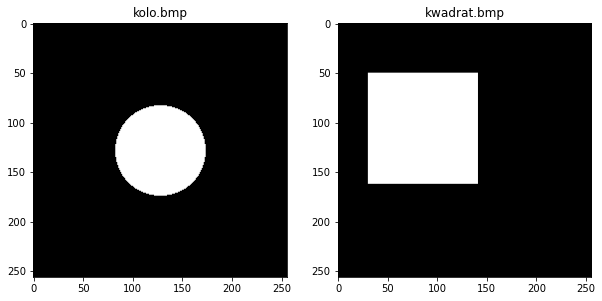

In [19]:
if not os.path.exists("kwadrat.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp
        
kwadrat = cv2.imread("kwadrat.bmp")

plt.figure (figsize=(10,10))
plt.subplot (121)
plt.title ("kolo.bmp")
plt.imshow (kolo)
plt.subplot (122)
plt.title ("kwadrat.bmp")
plt.imshow (kwadrat)
plt.show()

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

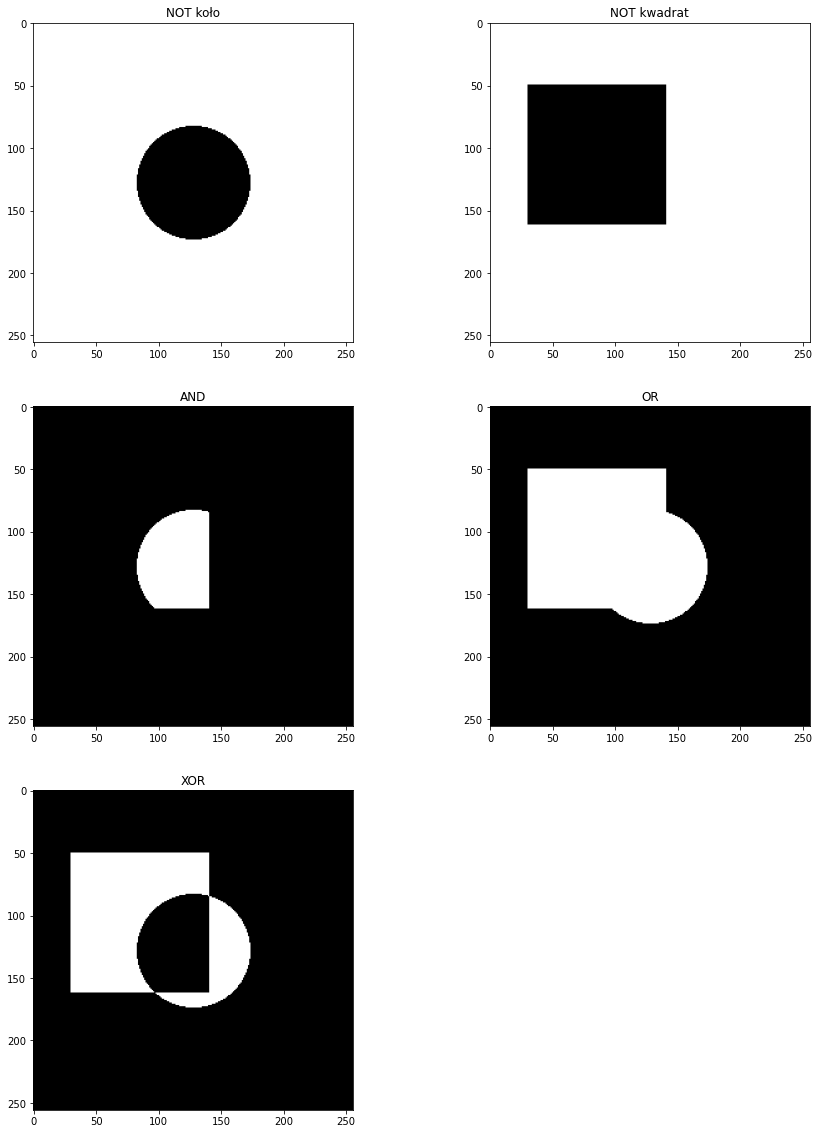

In [20]:
plt.figure (figsize=(15,20))
plt.subplot (321)
plt.title ("NOT koło")
plt.imshow (~ kolo)
plt.subplot (322)
plt.title ("NOT kwadrat")
plt.imshow (~ kwadrat)
plt.subplot (323)
plt.title ("AND")
plt.imshow (kolo & kwadrat)
plt.subplot (324)
plt.title ("OR")
plt.imshow (kolo | kwadrat)
plt.subplot (325)
plt.title ("XOR")
plt.imshow (kolo ^ kwadrat)
plt.show()